**2301961084 - VANGELIA PEACE PALIJAMA**

*ARTIFICIAL NEURAL NETWORK* ( LD01 )

2020/2021

## **LIBRARY**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import fashion_mnist
from keras.utils.np_utils import to_categorical
from keras.models import Sequential

from keras.layers import Conv1D
from keras.layers import MaxPooling1D, GlobalAveragePooling1D
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.regularizers import l2

from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout

from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

## **FUNCTIONS USED**

> pixelscale() : untuk melakukan pre-processing/normalisasi (scaler) pada data gambar yang berformat pixel.

In [ ]:
def pixelscale(x_train, x_test, x_val):
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_val = x_val.astype('float32')

    # Menormalisasi data pixel menjadi angka diantara 0-1
    x_train = x_train / 255.0
    x_test = x_test / 255.0
    x_val = x_val / 255.0

    return x_train, x_test, x_val

> CNN2D() : membangun model CNN untuk data input berbentuk 2D-matrix (dibangun dengan menggunakan *keras library*).

In [ ]:
def CNN2D():
    # Membentuk model CNN
    model = Sequential()
    
    # (Layer 1 - Input Layer) Menambahkan layer untuk menampung data input dengan jumlah node yang disetel sebanyak 32. 
    # - Ukuran kernel yang digunakan ialah 3 x 3, yang mengartikan bahwa akan dibentuk sebuah matrix dengan ukuran 3 x 3 yang berfungsi untuk mengekstrak fitur yang terdapat
    #   dalam data input dengan cara melakukan operasi matrix dot antara matrix data dengan kernel.
    # - Kernel initializer 'he_uniform' digunakan untuk menginitialisasi angka kernel secara random yang terdapat pada rentang limit dari distribusi uniform.
    # - input_shape(28, 28, 1) menandakan bahwa ukuran x dan y pada gambar masing-masing ialah 28 pixel, dan gambar berwarna grayscale (angka 1).
    # - activation function 'relu': digunakan untuk mengaktifkan neuron/node yang telah dibentuk. Keunggulan dari aktivasi ini ialah mampu mengatasi masalah vanishing gradient.
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    
    # Max Pooling digunakan setelah menambah layer untuk mereduksi dimensi/parameter pada fitur gambar (downsampling) dengan mengambil angka terbesar/termaksimum
    # di tiap area dengan ukuran matrix tertentu (pada kasus ini, ukuran yang digunakan ialah 2 x 2). 
    # Sebagai contoh, jika terdapat sebuah matrix: 
    # [ 3 2 5 9 ]
    # [ 4 6 7 2 ]
    # [ 1 1 1 8 ]
    # [ 6 5 2 3 ],
    # maka hasil Max Pooling dengan ukuran matrix 2 x 2 akan menjadi:
    # [ 6 9 ]
    # [ 6 8 ].
    model.add(MaxPooling2D((2, 2)))
    
    # (Layer 2 - Hidden Layer) Menambahkan layer untuk menampung data dari input layer dengan jumlah node yang disetel sebanyak 64.
    model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
    # Melakukan downsampling kembali daripada data input dengan ukuran matrix sebesar 2 x 2.
    model.add(MaxPooling2D(pool_size=(2,2)))

    # Meratakan/menggabungkan tiap neuron pada channel menjadi hanya 1 channel.
    # Sebagai contoh, data yang awalnya:
    # [ 1 2 ]
    # [ 4 3 ]
    # jika dilakukan Flatten(), maka data akan menjadi:
    # [ 1 2 4 3 ]. --> {fully connected layer}
    # Fungsi ini digunakan agar hasil kalkulasi akhir (output) sesuai dengan jumlah neuron yang ditetapkan pada Dense Layer (yaitu 1 channel).
    model.add(Flatten())

    # # # # #
    # model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    # (Layer 4 - Output Layer) Menampung hasil akhir kalkulasi dari layer-layer sebelumnya.
    # Terdapat 10 neuron pada layer ini, yang mengartikan bahwa ada 10 label/kategori yang diinginkan (terdapat 10 kategori pada dataset 'Fashion MNIST').
    model.add(Dense(10, activation='softmax'))
    
    # Mengkonfigurasi model dengan menetapkan jenis optimizer, loss, dan metrics yang ingin dievaluasi selama proses training dan validating.
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

> CNN1D() : membangun model CNN untuk data input berbentuk 1D-matrix (dibangun dengan menggunakan *keras library*).

In [ ]:
def CNN1D():
    # Membentuk model CNN
    model = Sequential()

    # (Layer 1 - Input Layer) Menambahkan layer untuk menampung data input dengan jumlah node yang disetel sebanyak 64. 
    # - Ukuran kernel yang digunakan ialah 3, yang mengartikan bahwa akan dibentuk sebuah matrix dengan ukuran (3,) yang berfungsi untuk mengekstrak fitur yang terdapat
    #   dalam data input dengan cara melakukan operasi matrix dot antara matrix data dengan kernel.
    # - Kernel initializer 'he_normal' digunakan untuk menginitialisasi angka kernel secara random yang terdapat pada rentang limit dari distribusi normal.
    # - input_shape(10001, 1) menandakan bahwa data input memiliki 10001 fitur dan data akan diproses menjadi gambar berwarna grayscale (angka 1).
    # - activation function 'relu': digunakan untuk mengaktifkan neuron/node yang telah dibentuk. Keunggulan dari aktivasi ini ialah mampu mengatasi masalah vanishing gradient.
    model.add(Conv1D(64, 3, activation='relu',  kernel_initializer='he_normal', input_shape=(10001, 1)))

    # Max Pooling dilakukan guna mereduksi dimensi/parameter pada fitur gambar (downsampling) dengan mengambil angka terbesar/termaksimum
    # di tiap area dengan ukuran matrix tertentu (pada kasus ini, ukuran yang digunakan ialah (2,)).
    model.add(MaxPooling1D(2))

    # (Layer 2 - Hidden Layer) Menambahkan layer untuk menampung data dari input layer dengan jumlah node yang disetel sebanyak 64.
    model.add(Conv1D(64, 3, activation='relu'))
    # # Melakukan downsampling kembali daripada data input dengan ukuran matrix sebesar (2,)
    model.add(MaxPooling1D(2))

    # # (Layer 3 - Hidden Layer) Menambahkan layer untuk menampung data dari input layer dengan jumlah node yang disetel sebanyak 64.
    model.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
    # GlobalAveragePooling1D(): Bersifat seperti fungsi Flatten() namun fungsi ini menghitung nilai rata-rata dari tiap input channel.
    model.add(GlobalAveragePooling1D())

    # Dropout: membuang sebanyak x neuron guna mencegah overfitting. (pada kasus ini, saya hendak membaung 40% dari total neuron yang ada)
    model.add(Dropout(0.4))
    # (Layer 4 - Output Layer) Membentuk 2 output neurons untuk menampung hasil komputasi untuk klasifikasi.
    # Menggunakan activation function 'softmax' karena aktivasi ini berbasis fungsi logistik yang mampu menentukan nilai probabilitas terakhir/final untuk klasifikasi.
    model.add(Dense(2, activation='softmax'))
    
    # Mengkonfigurasi model dengan menetapkan jenis optimizer, loss, dan metrics yang ingin dievaluasi selama proses training dan validating.
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

> convert(): Mengubah bentuk array yang sebelumnya > 2 dimensi menjadi 2 dimensi, yaitu: (jumlah data, jumlah fitur) dengan metode Flatten().

Sebagai contoh, jika terdapat array:

[[ 2 3 ]

 [ 4 5 ]] --> shape: (2, 2). 

Setelah dilakukan Flatten() akan menjadi: 

[[ 2 ]

[ 3 ]

[ 4 ]

[ 5 ]] --> shape (4,)

In [ ]:
def convert(arr):
    l = []
    for i in range(arr.shape[0]):
        l.append(arr[i].flatten())
    l=np.array(l)
    return l

> getPCA(): melakukan teknik PCA, yaitu mengekstrak/menyederhanakan dimensi dari sebuah data menjadi n-dimensi yang diinginkan dengan mentransformasi data secara linier.

In [ ]:
def getPCA(n, train, test, val):
    pca = PCA(n_components = n)
    pca = pca.fit(train)

    train = pca.transform(train)
    test = pca.transform(test)
    val = pca.transform(val)
    var = np.sum(pca.explained_variance_ratio_)

    return pca, train, test, val, var

> plot_eval(): memvisualisasikan hasil evaluasi dari nilai akurasi dan loss yang didapatkan selama proses training.

In [ ]:
def plot_eval(history):
    # Accuracy history plotting
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('MODEL ACCURACY')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    print()
    # Loss history plotting
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('MODEL LOSS')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

## **DNA DATASET**

#### 1) IMPORT AND PRE-PROCESSING DATASET

> Import dataset

In [ ]:
df = pd.read_csv('rawdata.csv')
df = df.drop('SAMPLE_ID', axis=1)
df

,snp_0,snp_1,snp_2,snp_3,snp_4,snp_5,snp_6,snp_7,snp_8,snp_9,snp_10,snp_11,snp_12,snp_13,snp_14,snp_15,snp_16,snp_17,snp_18,snp_19,snp_20,snp_21,snp_22,snp_23,snp_24,snp_25,snp_26,snp_27,snp_28,snp_29,snp_30,snp_31,snp_32,snp_33,snp_34,snp_35,snp_36,snp_37,snp_38,snp_39,...,snp_9962,snp_9963,snp_9964,snp_9965,snp_9966,snp_9967,snp_9968,snp_9969,snp_9970,snp_9971,snp_9972,snp_9973,snp_9974,snp_9975,snp_9976,snp_9977,snp_9978,snp_9979,snp_9980,snp_9981,snp_9982,snp_9983,snp_9984,snp_9985,snp_9986,snp_9987,snp_9988,snp_9989,snp_9990,snp_9991,snp_9992,snp_9993,snp_9994,snp_9995,snp_9996,snp_9997,snp_9998,snp_9999,snp_10000,STATUS
0,1,0,0,1,1,2,2,2,2,2,2,1,2,2,2,2,2,2,2,0,0,2,2,2,2,1,1,2,2,2,2,2,2,0,0,0,0,2,2,1,...,1,2,2,1,2,1,2,2,1,2,2,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,2,1,2,1,2,1,2,1
1,1,0,0,1,1,2,2,1,2,2,2,1,2,1,2,2,2,2,2,0,0,2,2,2,2,2,2,1,1,1,2,0,0,0,0,0,0,2,2,2,...,1,2,2,1,2,1,2,2,1,2,2,2,2,2,2,1,2,2,2,1,2,1,2,2,2,2,2,2,2,1,1,1,2,2,2,1,2,2,2,2
2,1,0,0,1,2,2,2,1,2,2,2,1,2,1,1,2,2,2,2,0,0,2,2,2,2,1,2,1,2,1,2,2,2,0,0,0,0,2,2,1,...,1,2,2,2,2,1,2,2,1,2,2,1,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,1,1,2,2,2,1,2,2,2,1,2,2
3,1,0,0,1,1,2,2,1,2,2,2,1,1,2,2,2,2,2,2,0,0,2,2,2,2,1,1,2,2,2,2,2,2,0,0,0,0,2,2,2,...,1,1,1,1,2,1,2,1,1,2,2,1,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,1,1,2,2,2,2,1,2,2,2,1,2,2
4,1,0,0,1,1,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,2,2,2,2,2,2,2,2,1,2,1,...,1,1,2,1,2,2,2,2,1,2,2,2,2,2,2,2,2,1,2,2,2,2,2,1,2,2,2,2,1,1,2,2,2,2,2,2,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1,0,0,1,1,1,1,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,2,1,...,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,2,2,1,1,2,2,1,1,2
85,1,0,0,1,2,2,2,1,2,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,2,1,2,1,2,1,2,2,2,1,2,2,2,1,2,2,...,1,1,2,1,2,1,2,1,1,2,2,1,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,1,1,2,2,2,2,1,2,2,2,1,2,2
86,1,0,0,1,2,1,2,2,2,2,2,2,2,2,2,2,2,0,0,2,2,0,0,0,0,1,2,2,2,2,2,0,0,2,2,2,2,1,2,1,...,1,1,2,1,1,1,1,1,1,2,2,2,2,2,2,1,2,2,2,1,2,1,2,2,2,2,2,2,2,1,2,2,2,2,2,1,1,2,2,1
87,1,0,0,1,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...,1,2,2,1,1,1,1,1,1,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,2,1,2,1,2,1,1,1


> Melakukan split dataset (menjadi features-x dan label-y).

In [ ]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values.reshape(-1, 1)

> Melakukan pre-processing data dengan melakukan OneHotEncoder pada data sehingga menghasilkan data dalam bentuk biner.

In [ ]:
# Pre-processing data 'features-x'
x = x.astype('float32')
scaler = MinMaxScaler().fit(x)
x = scaler.transform(x)
# Pre-processing data 'label-y'
encoder = OneHotEncoder().fit(y)
y = encoder.transform(y).toarray()

> Membagi kembali dataset menjadi data training dan testing dengan ukuran ratio 50:7 (disesuaikan dengan ukuran ratio pada train-test data 'Fashion MNIST')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.86, random_state=1)

> Membagi kembali data pada test set untuk keperluan validasi dengan ukuran ratio (3:2).

In [ ]:
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, train_size=0.6, random_state=1)

In [ ]:
print(f"x_train shape\t: {x_train.shape}")
print(f"x_test shape\t: {x_test.shape}")
print(f"x_val shape\t: {x_val.shape}")

x_train shape	: (76, 10001)
x_test shape	: (7, 10001)
x_val shape	: (6, 10001)


> Melakukan reshape pada data features-x agar dapat diproses dalam model CNN yang menerima input 3-channel, yaitu: (jumlah data keseluruhan, jumlah fitur pada data, dan ukuran channel dari warna gambar [1-grayscale, 3-RGB]).

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

In [ ]:
x_train[0]

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [0.]], dtype=float32)

#### 2) CNN IMPLEMENTATION (without PCA)

> Memanggil function CNN1D() untuk membangun model CNN untuk dataset 1D-matrix.

> Melakukan training pada model CNN dengan function 'model.fit' dengan menggunakan training set, yang mana tiap epoch akan melakukan 76/2 iterasi (dikarenakan jumlah dataset = 76 dan batch_size = 2).

> Hasil training model akan divalidasi menggunakan validating set.

In [ ]:
dna_model = CNN1D()
history = dna_model.fit(x_train, y_train, epochs=20, batch_size=2, validation_data=(x_val, y_val), verbose=1)

Epoch 1/20
38/38 [==============================] - 45s 22ms/step - loss: 0.9998 - accuracy: 0.5101 - val_loss: 0.6914 - val_accuracy: 0.6667
Epoch 2/20
38/38 [==============================] - 0s 5ms/step - loss: 0.7599 - accuracy: 0.5010 - val_loss: 0.8113 - val_accuracy: 0.3333
Epoch 3/20
38/38 [==============================] - 0s 5ms/step - loss: 0.7065 - accuracy: 0.5037 - val_loss: 0.6984 - val_accuracy: 0.3333
Epoch 4/20
38/38 [==============================] - 0s 4ms/step - loss: 0.7368 - accuracy: 0.4811 - val_loss: 0.7845 - val_accuracy: 0.3333
Epoch 5/20
38/38 [==============================] - 0s 4ms/step - loss: 0.7435 - accuracy: 0.5463 - val_loss: 0.6810 - val_accuracy: 0.6667
Epoch 6/20
38/38 [==============================] - 0s 4ms/step - loss: 0.6915 - accuracy: 0.5306 - val_loss: 0.7150 - val_accuracy: 0.3333
Epoch 7/20
38/38 [==============================] - 0s 4ms/step - loss: 0.7304 - accuracy: 0.4215 - val_loss: 0.6798 - val_accuracy: 0.6667
Epoch 8/20
38/38 [

> Melakukan evaluasi/testing pada model yang sudah dilakukan training sebelumnya dengan menggunakan testing dataset dengan batch_size = 1 dikarenakan hanya terdapat 7 data pada testing dataset.

In [ ]:
dna_model.evaluate(x_test, y_test, batch_size=1)

7/7 [==============================] - 0s 3ms/step - loss: 0.6908 - accuracy: 0.5714


[0.6908454298973083, 0.5714285969734192]

> Melakukan evaluation model plotting pada hasil training dan validation yang dilakukan sebelumnya pada 'model.fit'.

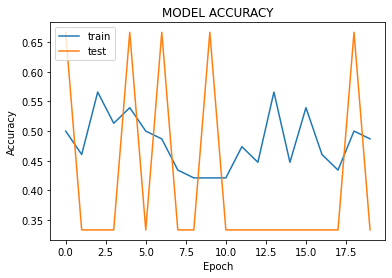

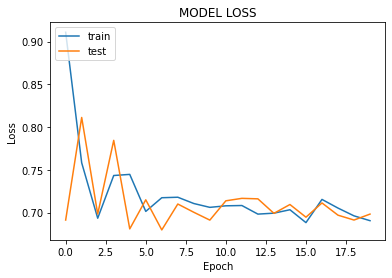

In [ ]:
plot_eval(history)

> Melalui plotting ini, dapat terlihat bahwa loss terus berkurang seiring berjalannya epoch. Namun, akurasi model terlihat tidak stabil (pada beberapa epoch, angka melesat tinggi namun langsung turun pada epoch selanjutnya). Hal ini menyimpulkan bahwa model yang dilatih tidak terlalu bekerja dengan baik.

#### 3) CNN IMPLEMENTATION (with PCA)

> Mengubah shape array yang sebelumnya 3D-array (x, y, 1) menjadi (x, y) dengan metode Flatten().

In [ ]:
x_train = convert(x_train)
x_test = convert(x_test)
x_val = convert(x_val)

In [ ]:
x_train.shape

(76, 10001)

> Mengurangi dimensi pada data 'features-x' menggunakan teknik PCA dengan jumlah komponen (n_components) = 65.

> Dengan n_components = 65, total variance ratio yang didapatkan ialah 91% (yang mana hal ini baik, karena lebih dari 80%).

Variance ratio pada PCA ini sendiri didapatkan dari hasil kalkulasi eigen value dan eigen vector ketika menjalankan PCA. Variance ratio berfungsi adalah persentase varians dari masing-masing komponen yang telah dipilih (sebanyak n). 

In [ ]:
n = 70
pca, pca_train, pca_test, pca_val, var = getPCA(n, x_train, x_test, x_val)
print(f"Variance Ratio: {var}")

Variance Ratio: 0.9531686902046204


In [ ]:
print(pca_train.shape)
pca_train[0]

(76, 70)


array([-0.17684959, -2.3499177 , -3.3952172 ,  3.135495  , -4.4990864 ,
        0.16914918,  4.3781576 ,  1.4457352 ,  1.1532981 ,  7.893315  ,
       -6.7073536 ,  5.687901  ,  7.5460877 ,  0.46803385,  3.215711  ,
       -4.7983923 ,  3.2556615 ,  5.950252  ,  2.0683935 , -1.6274409 ,
        2.4789872 ,  3.1251383 , -5.417343  ,  1.2410707 ,  0.5052772 ,
        2.3445945 , -1.9790597 ,  1.7522115 , -1.7555857 ,  5.7222514 ,
        0.49033427, -3.7870789 , -5.6843443 ,  0.277319  , -1.2218746 ,
        0.2549911 , -2.069643  , -1.7008145 ,  1.3777957 ,  3.8357327 ,
        2.3638997 ,  8.706407  ,  7.798467  , -5.8444247 ,  5.69608   ,
       -0.6651663 ,  0.4473747 ,  4.261301  , -0.5242943 , -0.11969687,
       -2.1332085 , -0.9720872 ,  1.0105999 , -4.115673  ,  4.3425403 ,
       -1.8257937 ,  5.7595453 , -3.6670363 , -2.0256693 ,  1.7777905 ,
        3.8444755 ,  0.64735377, -2.4539614 ,  1.7811759 ,  1.9478419 ,
        0.05434764,  3.3228812 ,  2.0253053 , -0.88242316, -2.10

In [ ]:
temp1 = pca.inverse_transform(pca_train)
temp2 = pca.inverse_transform(pca_test)
temp3 = pca.inverse_transform(pca_val)

> Melakukan reshape pada data 'features-x' dengan mengembalikan shape/struktur awal dari data, dan data dapat diproses dalam model CNN.

In [ ]:
pca_train = np.reshape(temp1, (pca_train.shape[0], 10001, 1))
pca_test = np.reshape(temp2, (pca_test.shape[0], 10001, 1))
pca_val = np.reshape(temp3, (pca_val.shape[0], 10001, 1))

> Memanggil function CNN1D() untuk membangun model CNN untuk dataset 1D-matrix.

> Melakukan training pada model CNN dengan function 'model.fit' dengan menggunakan training set, yang mana tiap epoch akan melakukan 76/2 iterasi (dikarenakan jumlah dataset = 76 dan batch_size = 2).

> Hasil training model akan divalidasi menggunakan validating set.

In [ ]:
dna_model = CNN1D()
pca_history = dna_model.fit(pca_train, y_train, epochs=20, batch_size=2, validation_data=(pca_val, y_val), verbose=1)

Epoch 1/20
38/38 [==============================] - 1s 14ms/step - loss: 0.8116 - accuracy: 0.4800 - val_loss: 0.8125 - val_accuracy: 0.3333
Epoch 2/20
38/38 [==============================] - 0s 5ms/step - loss: 0.8537 - accuracy: 0.4664 - val_loss: 0.7202 - val_accuracy: 0.3333
Epoch 3/20
38/38 [==============================] - 0s 5ms/step - loss: 0.6798 - accuracy: 0.5826 - val_loss: 0.6927 - val_accuracy: 0.6667
Epoch 4/20
38/38 [==============================] - 0s 5ms/step - loss: 0.6842 - accuracy: 0.6199 - val_loss: 0.7338 - val_accuracy: 0.3333
Epoch 5/20
38/38 [==============================] - 0s 5ms/step - loss: 0.7307 - accuracy: 0.4759 - val_loss: 0.7173 - val_accuracy: 0.3333
Epoch 6/20
38/38 [==============================] - 0s 4ms/step - loss: 0.7059 - accuracy: 0.5036 - val_loss: 0.7039 - val_accuracy: 0.3333
Epoch 7/20
38/38 [==============================] - 0s 4ms/step - loss: 0.6813 - accuracy: 0.5690 - val_loss: 0.7076 - val_accuracy: 0.3333
Epoch 8/20
38/38 [=

> Melakukan evaluasi/testing pada model yang sudah dilakukan training sebelumnya dengan menggunakan testing dataset dengan batch_size = 1 dikarenakan hanya terdapat 7 data pada testing dataset.

In [ ]:
dna_model.evaluate(pca_test, y_test, batch_size=1)

7/7 [==============================] - 0s 3ms/step - loss: 0.6894 - accuracy: 0.5714


[0.6894017457962036, 0.5714285969734192]

> Melakukan evaluation model plotting pada hasil training dan validation yang dilakukan sebelumnya pada 'model.fit'.

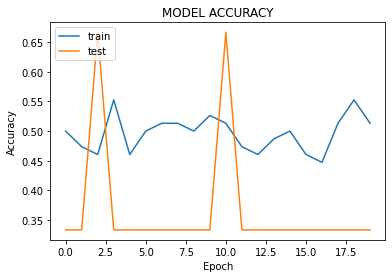

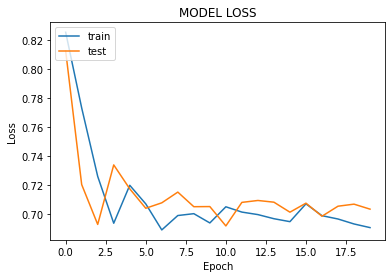

In [ ]:
plot_eval(pca_history)

> Sama seperti model sebelumnya (tanpa PCA), hasil loss cenderung menurun namun akurasi menunjukkan grafik yang tidak stabil.Dengan demikian, model yang dilatih juga tidak terlalu bekerja dengan baik. Saya berasumsi hal ini terjadi karena kurangnya jumlah data latih (training dataset) sehingga akurasi yang dihasilkan cukup stagnan (kemungkinan terjadi *overfitting* pada model ini).

## **FASHION MNIST DATASET**

#### 1) IMPORT AND PRE-PROCESSING DATASET

> Import dataset dari *keras library*

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


> Melakukan pre-processing pada dataset dengan melakukan reshape pada data 'features-x' (agar data dapat diproses di dalam model CNN) dan melakukan one-hot coding pada data 'label-y' dengan  fungsi to_categorical() dari *keras library*.

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], 28, 28, 1))
x_test = np.reshape(x_test, (x_test.shape[0], 28, 28, 1))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

> Membagi data pada test set untuk keperluan validasi dengan ukuran ratio (3:2).

In [ ]:
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, train_size=0.6, random_state=1)

In [ ]:
print(f"x_train shape\t: {x_train.shape}")
print(f"x_test shape\t: {x_test.shape}")
print(f"x_val shape\t: {x_val.shape}")

x_train shape	: (60000, 28, 28, 1)
x_test shape	: (6000, 28, 28, 1)
x_val shape	: (4000, 28, 28, 1)


> Melakukan normalisasi pada data 'features-x' yang sebelumnya berupa angka pixel di rentang 0-255 menjadi angka di rentang 0-1 dengan menggunakan metode scaler.

In [ ]:
x_train, x_test, x_val = pixelscale(x_train, x_test, x_val)

#### 2) CNN IMPLEMENTATION (without PCA)

> Memanggil function CNN2D() untuk membangun model CNN untuk dataset 2D-matrix.

> Melakukan training pada model CNN dengan function 'model.fit' dengan menggunakan training set, yang mana tiap epoch akan melakukan 60000/250 iterasi (dikarenakan jumlah dataset = 60.000 dan batch_size = 250).

> Hasil training model akan divalidasi menggunakan validating set.

In [ ]:
# CONSTRUCT AND TRAIN THE MODEL
model = CNN2D()
his = model.fit(x_train, y_train, epochs=20, batch_size=250, validation_data=(x_val, y_val), verbose=1)

Epoch 1/20
240/240 [==============================] - 3s 8ms/step - loss: 0.9042 - accuracy: 0.6954 - val_loss: 0.4376 - val_accuracy: 0.8435
Epoch 2/20
240/240 [==============================] - 2s 6ms/step - loss: 0.3879 - accuracy: 0.8618 - val_loss: 0.3742 - val_accuracy: 0.8658
Epoch 3/20
240/240 [==============================] - 2s 6ms/step - loss: 0.3285 - accuracy: 0.8816 - val_loss: 0.3485 - val_accuracy: 0.8763
Epoch 4/20
240/240 [==============================] - 2s 6ms/step - loss: 0.3050 - accuracy: 0.8903 - val_loss: 0.3458 - val_accuracy: 0.8745
Epoch 5/20
240/240 [==============================] - 2s 6ms/step - loss: 0.2842 - accuracy: 0.8977 - val_loss: 0.3139 - val_accuracy: 0.8888
Epoch 6/20
240/240 [==============================] - 2s 6ms/step - loss: 0.2692 - accuracy: 0.9019 - val_loss: 0.3144 - val_accuracy: 0.8903
Epoch 7/20
240/240 [==============================] - 2s 7ms/step - loss: 0.2592 - accuracy: 0.9059 - val_loss: 0.3033 - val_accuracy: 0.8910
Epoch 

> Melakukan evaluasi/testing pada model yang sudah dilakukan training sebelumnya dengan menggunakan testing dataset dengan batch_size yang sama yaitu sebesar 250.

In [ ]:
# EVALUATE THE MODEL USING TEST DATASET
model.evaluate(x_test, y_test, batch_size=250)

24/24 [==============================] - 0s 4ms/step - loss: 0.2606 - accuracy: 0.9110


[0.26063477993011475, 0.9110000133514404]

> Melakukan evaluation model plotting pada hasil training dan validation yang dilakukan sebelumnya pada 'model.fit'.

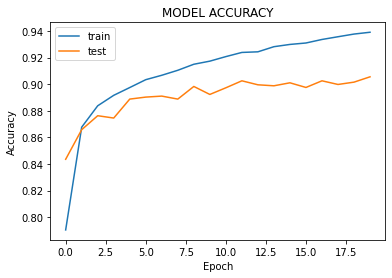

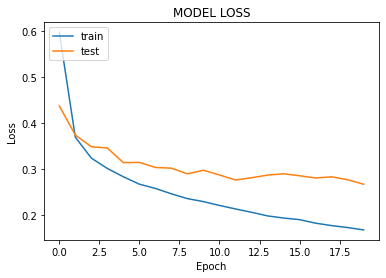

In [ ]:
plot_eval(his)

> Melalui plotting ini, dapat terlihat bahwa model yang dilatih bekerja dengan baik. Hal ini dapat dilihat dari nilai akurasi terus mengalami kenaikan dan nilai loss terus mengalami penurunan seiring dengan naiknya jumlah epoch baik pada training maupun testing dataset.

#### 3) CNN IMPLEMENTATION (with PCA)

> Berikut adalah tampilan dari salah satu gambar pada dataset dalam bentuk pixel.

(28, 28)


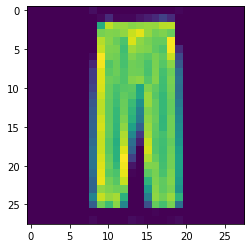

In [ ]:
img = x_train[21]
img = img.reshape(img.shape[0], img.shape[1])
print(img.shape)
plt.imshow(img)

> Melakukan metode Flatten() pada data 'features-x' agar membentuk 1 fully connected layer yang dapat diproses oleh fungsi PCA.

In [ ]:
x_train = convert(x_train)
x_test = convert(x_test)
x_val = convert(x_val)

In [ ]:
x_train.shape

(60000, 784)

> Dari 784-dimensional space (dari 28 x 28), gambar akan direduksi dimensinya menjadi 150-dimensional space.

Dengan n_components = 250, total variance ratio yang didapatkan ialah 96.5% (yang mana hal ini baik, karena lebih dari 80% sehingga mencegah terjadinya overfitting).

In [ ]:
n = 250
pca, pca_train, pca_test, pca_val, var = getPCA(n, x_train, x_test, x_val)
print(f"Variance Ratio: {var}")

Variance Ratio: 0.9647011756896973


In [ ]:
temp1 = pca.inverse_transform(pca_train)
temp2 = pca.inverse_transform(pca_test)
temp3 = pca.inverse_transform(pca_val)

> Melakukan reshape pada data 'features-x' dengan mengembalikan shape data yang semula, dan data dapat diproses dalam model CNN.

In [ ]:
pca_train = np.reshape(temp1, (pca_train.shape[0], 28, 28, 1))
pca_test = np.reshape(temp2, (pca_test.shape[0], 28, 28, 1))
pca_val = np.reshape(temp3, (pca_val.shape[0], 28, 28, 1))

> Berikut adalah hasil gambar yang telah direduksi dimensinya dengan menggunakan PCA. Dapat dilihat bahwa dengan n = 250, pola gambar masih dapat terlihat dengan baik.

(28, 28)


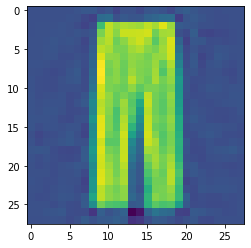

In [ ]:
img = pca_train[21]
img = img.reshape(img.shape[0], img.shape[1])
print(img.shape)
plt.imshow(img)

> Memanggil function CNN2D() untuk membangun model CNN untuk dataset 2D-matrix.

> Melakukan training pada model CNN dengan function 'model.fit' dengan menggunakan training set, yang mana tiap epoch akan melakukan 60000/250 iterasi (dikarenakan jumlah dataset = 60.000 dan batch_size = 250).

> Hasil training model akan divalidasi menggunakan validating set.

In [ ]:
pca_model = CNN2D()
pca_his = pca_model.fit(pca_train, y_train, epochs=20, batch_size=250, validation_data=(pca_val, y_val), verbose=1)

Epoch 1/20
240/240 [==============================] - 3s 8ms/step - loss: 0.9033 - accuracy: 0.6875 - val_loss: 0.4508 - val_accuracy: 0.8320
Epoch 2/20
240/240 [==============================] - 2s 6ms/step - loss: 0.4033 - accuracy: 0.8543 - val_loss: 0.4046 - val_accuracy: 0.8570
Epoch 3/20
240/240 [==============================] - 2s 7ms/step - loss: 0.3511 - accuracy: 0.8739 - val_loss: 0.3620 - val_accuracy: 0.8752
Epoch 4/20
240/240 [==============================] - 2s 6ms/step - loss: 0.3215 - accuracy: 0.8853 - val_loss: 0.3563 - val_accuracy: 0.8755
Epoch 5/20
240/240 [==============================] - 2s 6ms/step - loss: 0.3077 - accuracy: 0.8885 - val_loss: 0.3511 - val_accuracy: 0.8740
Epoch 6/20
240/240 [==============================] - 2s 6ms/step - loss: 0.2868 - accuracy: 0.8962 - val_loss: 0.3265 - val_accuracy: 0.8832
Epoch 7/20
240/240 [==============================] - 2s 6ms/step - loss: 0.2763 - accuracy: 0.9001 - val_loss: 0.3175 - val_accuracy: 0.8842
Epoch 

> Melakukan evaluasi/testing pada model yang sudah dilakukan training sebelumnya dengan menggunakan testing dataset dengan batch_size = 250.

In [ ]:
pca_model.evaluate(pca_test, y_test, batch_size=250)

24/24 [==============================] - 0s 3ms/step - loss: 0.2788 - accuracy: 0.9005


[0.27879369258880615, 0.9004999995231628]

> Melakukan evaluation model plotting pada hasil training dan validation yang dilakukan sebelumnya pada 'model.fit'.

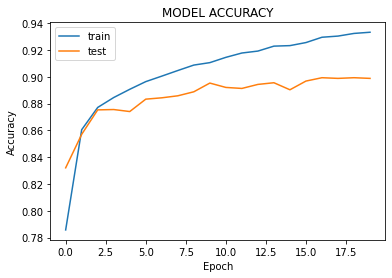

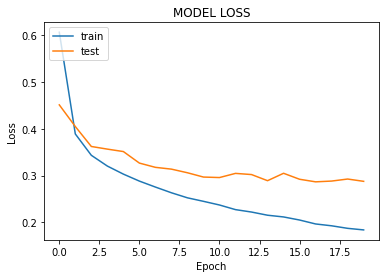

In [ ]:
plot_eval(pca_his)

> Sama seperti model sebelumnya (Fashion MNIST tanpa PCA), model yang dilatih bekerja dengan baik. Nilai akurasi terus mengalami kenaikan dan nilai loss terus mengalami penurunan seiring dengan naiknya jumlah epoch baik pada training maupun testing dataset. Saya berasumsi hal ini dapat tercapai karena banyak jumlah dataset yang digunakan baik untuk training (60,000) maupun testing (6,000). Sehingga model dapat lebih adaptif dalam mengenal pola dari dataset yang diberikan.